<img src="../logo.png" align="right" width="150" />

#### Teoría de Circuitos II

# Trabajo Semanal 2
#### *Tobias Bavasso Piizzi*

# Enunciado
<img src="./circuit1.png" align="center" width="400"/>

👉  Hallar la transferencia  T igual fracción V subíndice o entre V subíndice i en función de omega subíndice 0 y Q.

👉  Obtener el valor de los componentes del circuito de forma tal que omega subíndice 0 igual 1 y Q igual 10

👉  Ajustar el valor de R1 de forma tal que abrir barra vertical T paréntesis izquierdo 0 paréntesis derecho cerrar barra vertical igual 20 espacio d B.

+10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.

+10 🎓 Calcular las sensibilidades  grande S subíndice C superíndice omega subíndice 0 fin superíndice coma espacio grande S subíndice R subíndice 2 fin subíndice superíndice Q coma espacio grande S subíndice R subíndice 3 fin subíndice superíndice Q.

+20 🤯 Recalcular los valores de la red para que cumpla con una transferencia Butterworth.

+5   🎸 Cómo podría obtener un circuito pasabanda a partir del circuito dado.

+5  ⚽️ Simulación circuital.

+5  🍺 Presentación en jupyter notebook

## Transferencia

La resolución detallada se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal1/tarea.pdf) 

Se plantean las ecuaciones en las entradas del **OPAMP**

+ Nodo 1
\begin{equation}
\label{eqn:n1}\tag{1}
-V_1(s) \cdot \frac{1}{R_1} - V_a(s) \cdot (\frac{1}{R_2} + s \cdot C) - V_o(s) \cdot \frac{1}{R_3} = 0
\end{equation}

+ Nodo 2
\begin{equation}
\label{eqn:n2}\tag{2}
-V_a(s) \cdot \frac{1}{R_3} - V_b(s) \cdot s \cdot C  = 0
\end{equation}

+ Nodo 3
\begin{equation}
\label{eqn:n3}\tag{3}
-V_b(s) \cdot \frac{1}{R_4} - V_o(s) \cdot \frac{1}{R_4}   = 0
\end{equation}

+ Finalmente _combinando_ las ecuaciones \ref{eqn:n1} , \ref{eqn:n2} , \ref{eqn:n2}

\begin{equation}
\label{eqn:trans}
T(s) = \frac{R_3}{R_1} \cdot \frac{\frac{1}{C^2 \cdot R_3^2}}{s^2 + s \frac{1}{C \cdot R_2} + \frac{1}{C^2 \cdot R_3^2}} 
\end{equation}

+ Tomando forma

$\omega$$_0$ = $\frac{1}{C \cdot R_3}$ = 1 $\frac{r}{s}$

$ Q = \frac{R_2}{R_3} = 10 $

$ K = \frac{R_3}{R_1} = 10 $

\begin{equation}
\label{eqn:forma}
T(s) = K \cdot \frac{ \omega_o^2 }{s^2 + s \frac{\omega_o}{Q} + \omega_o^2} 
\end{equation}

+ Poniendo valores para cumplir los requisitos

$ R_3 = 1\Omega $

$ C = 1 F $

$ R_2 = 10\Omega $

$ R_1 = 0.1\Omega $






## Simulación Circuital
Para realizar la simulación circuital se utiliza el software [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) para poder visualizar la respuesta en frecuencia del circuito. Observando el gráfico podemos confirmar que estamos en presencia de un **filtro pasa bajo**.

Es importante recordar que el eje del simulador se encuentra en frecuencia, por eso nuestro punto de interés es

$ \omega = 2 \cdot \pi \cdot f$

Entonces analizamos en $ f = \frac{1}{2 \cdot \pi}$
<img src="./circuito.png" align="center" width="1000"/>

<img src="./simul.png" align="center" width="1000"/>

Del gráfico podemos resultar que cumple con las **_especificaciones de la banda de paso, así como su ganancia en la misma_**




## Simulación Matemática


      10
---------------
s^2 + 0.1 s + 1

Pole: [-0.05+0.99874922j -0.05-0.99874922j] Zero: []


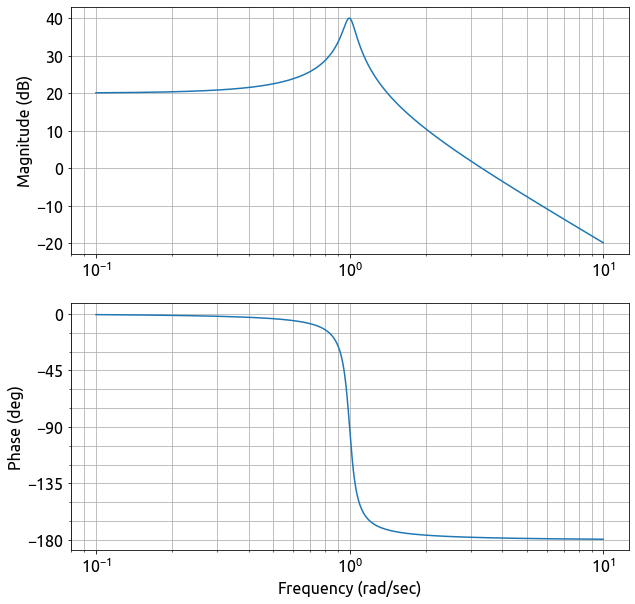

(array([-0.05+0.99874922j, -0.05-0.99874922j]), array([], dtype=float64))

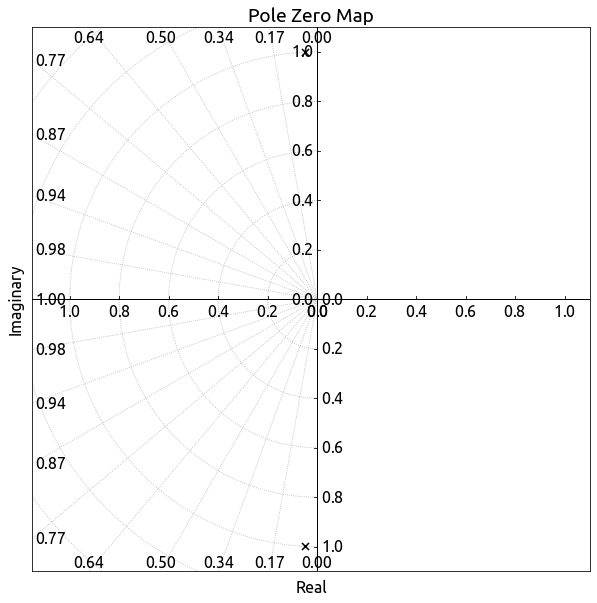

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

@author: toto
"""
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import control.matlab as ml
#from matplotlib import pyplot as plt


# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

#%%1ºCelda
#Selecciono los componentes
K = 10
Q = 10
R1 = 1/K
R2 = Q
R3 = 1
C = 1
R4 = 1

W01 = 1/(C*R3)
K1 = R3/R1
Q1 = R2/R3

num1 = np.array([ K1*W01 ])
den1 = np.array([ 1, W01/Q1 , W01**2])

#%%
H1 = ml.tf( num1, den1 )
print(H1)
print("Pole:",ml.pole(H1),"Zero:",ml.zero(H1))



fig1 = plt.figure()
fig1.suptitle("Gráfico de Bode")
mag,pahse,w =ml.bode(H1)
plt.show()

fig5 = plt.figure()
ml.pzmap(H1, plot=True,grid=True)
#%%